In [433]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from matplotlib import cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, silhouette_score, silhouette_samples, davies_bouldin_score, adjusted_rand_score
from collections import Counter
from itertools import product


## Carga de Datos

Obtenemos el dataframe de `clases.txt` en la variable **clases_data** y el dataframe de `dataset_tissue.txt` en la variable **data**

In [434]:
clases = pd.read_csv('clase.txt', delimiter=',')
clases_data = pd.DataFrame(np.delete(clases, 0, axis=1))

data = pd.read_csv('dataset_tissue.txt', delimiter=',')
data = data.T
data

,0,1,2,3,4,5,6,7,8,9,...,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
Unnamed: 0,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.92169,5.71819,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.33913,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.96243,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.41598,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.60365,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,7.095949,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.90008,6.982293,5.998825,6.779777,5.370535,...,7.056859,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.07374
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,8.314995,5.65109,7.5469,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.64366,5.501452,...,7.860281,5.741697,7.509888,7.643282,8.384567,6.64589,7.64461,8.195537,8.589336,7.627872


## Redimensión de la matriz Data: ¿*PCA* o *SVD*?

Para reducir la dimensionalidad de la matriz **data**, tenemos dos opciones o métodos: *PCA* y *SVD*. Para comparar ambos métodos, la varianza en relación al uso de la cantidad de componentes.

Antes de realizar el análisis, debemos eliminar la primera fila de la matriz **data** que contiene los nombres de las columnas.

In [435]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_escaled = scaler.fit_transform(data.drop(['Unnamed: 0'], axis=0))
temp_data = data.drop(['Unnamed: 0'], axis=0)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(temp_data)

Ahora sí, procedemos a realizar el análisis.

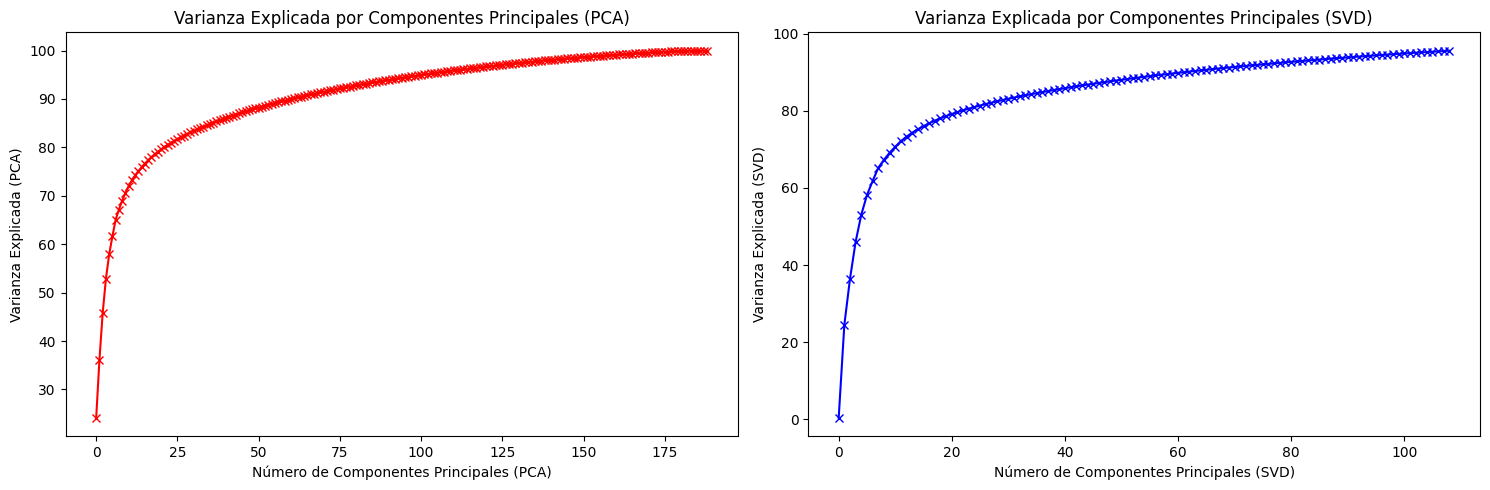

In [436]:
#PCA
pca = PCA()
pca.fit(normalized_data)
pca_data = pca.transform(normalized_data)
explained_variance_pca = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

# SVD
svd = TruncatedSVD(n_components=normalized_data.shape[0]-80)
svd.fit(normalized_data)
svd_data = svd.transform(normalized_data)
explained_variance_svd = np.cumsum(np.round(svd.explained_variance_ratio_, decimals=4) * 100)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(explained_variance_pca, 'r-x')
plt.xlabel('Número de Componentes Principales (PCA)')
plt.ylabel('Varianza Explicada (PCA)')
plt.title('Varianza Explicada por Componentes Principales (PCA)')

plt.subplot(1, 2, 2)
plt.plot(explained_variance_svd, 'b-x')
plt.xlabel('Número de Componentes Principales (SVD)')
plt.ylabel('Varianza Explicada (SVD)')
plt.title('Varianza Explicada por Componentes Principales (SVD)')

plt.tight_layout()
plt.show()

Como podemos ver las gráficas, la diferencia entre ambas técnicas no varía mucho.

Calcularemos la varianza exacta con 75 componentes para cada técnica.

In [437]:
v1 = np.sum(pca.explained_variance_ratio_[:75]) * 100
v2 = np.sum(svd.explained_variance_ratio_[:75]) * 100
print("Varianza explicada por los primeros 75 componentes principales (PCA): ", v1)
print("Varianza explicada por los primeros 75 componentes principales (SVD): ", v2)

Varianza explicada por los primeros 75 componentes principales (PCA):  92.08150700006573
Varianza explicada por los primeros 75 componentes principales (SVD):  91.95341982076793


Luego de este cálculo, confirmamos que la diferencia entre ambas técnicas es casi nula. Así que elegiremos la técnica de *PCA* para reducir la dimensionalidad de la matriz **data**. Además, utilizaremos solo 75 componentes porque es suficiente para explicar más del 90% de la varianza.

Almacenaremos la data redimensionada en la variable **data_pca**.

In [438]:
# svd = TruncatedSVD(n_components=75)
# svd.fit(normalized_data)
# data_reduced = svd.transform(normalized_data)
data_reduced = pd.DataFrame(pca_data[:,0:75])
data_reduced = data_reduced.values
print(data_reduced.shape)
print(data_reduced)

(189, 75)
[[-5.42329124e+00 -1.22683582e+01  9.00111828e+00 ...  8.45714631e-01
  -8.50704060e-01  7.58289853e-01]
 [-8.73275835e+00 -1.25953880e+01  6.33177511e+00 ...  2.03405685e+00
   6.43983368e-01 -6.89445404e-01]
 [-9.24502852e+00 -9.77645649e-01  8.71379404e+00 ... -4.06393517e-01
   1.51294967e-01  9.65316581e-02]
 ...
 [-1.31000287e+01 -6.45710550e+00  2.56779968e+00 ...  5.63296062e-01
   1.62097233e-01 -3.37267422e-01]
 [-1.46883382e+01  1.91934162e-02  1.31596616e+00 ...  1.64055368e-01
  -3.05552116e-03 -1.88047900e-01]
 [-1.66745308e+01  2.50669202e-01  1.01034996e+00 ...  1.88552469e-01
  -1.31953668e-01  4.34177299e-01]]


##  K-means

### Implementación del algoritmo

1. **Inicialización de centroides** - `Init_Centroide(data, k)`: Para inicializar los *k* centroides, implementamos el algoritmo *k-means++*, para así tener una mejor inicialización de los centroides. De un punto aleatorio, se calcula la distancia de cada punto a este punto aleatorio. Luego, se elige el punto que tenga la mayor distancia. Este punto será el segundo centroide. Para el tercer centroide, se calcula la distancia de cada punto al centroide más cercano. Y así sucesivamente hasta tener *k* centroides.

2. **Cálculo de distancias y asignación de clusters** - `get_cluster(data, centroides)`: Para obtener el cluster de cada punto, se calcula la distancia de cada punto a cada centroide con la ecuación de la distancia euclidiana. Luego, se elige el centroide más cercano y se asigna el punto a ese centroide.

3. **Actualización de centroides** - `update_centroides(data, clusters)`: Para actualizar los centroides, se calcula la media de cada cluster y se asigna como el nuevo centroide.

4. **Cálculo de las distancias de los nuevos centroides a los antiguos centroides** - `distancia_promedio_centroides(old_centroide, new_centroide)`: Para calcular la distancia de los nuevos centroides a los antiguos centroides, se calcula la distancia de cada nuevo centroide al centroide antiguo con la ecuación de la distancia euclidiana. Luego, se calcula la media de todas las distancias. Esto servirá para hacer la condición de parada del algoritmo, puesto que, si la distancia promedio es menor a un umbral, el algoritmo se detendrá.

In [439]:
def Init_Centroide(data, k):#Implementación k++ para inicializar los centroides
    # indices = np.random.choice(data.shape[0], k, replace=False)
    # return data[indices]
    centroids = [data[np.random.choice(data.shape[0])]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(p - c) ** 2 for c in centroids) for p in data])
        new_centroid = data[np.argmax(distances)]
        centroids.append(new_centroid)
    
    return centroids

def get_cluster(data, centroides):
    distancias = np.linalg.norm(data[:, np.newaxis, :] - centroides, axis=2)
    clusters = np.argmin(distancias, axis=1)
    return clusters

def return_new_centroide(grupos, data, k):
    new_centroides = np.zeros((k, data.shape[1]))#Matriz de ceros de k filas y n columnas en donde irán los nuevos centroides
    for i in range(k):
        cluster_points = data[grupos == i]
        if cluster_points.size > 0:
            new_centroides[i] = np.mean(cluster_points, axis=0)
    return new_centroides

def distancia_promedio_centroides(old_centroide, new_centroide):
    distancias = [np.linalg.norm(old - new) for old, new in zip(old_centroide, new_centroide)]

    distancia_promedio = np.mean(distancias)

    return distancia_promedio

def kmeans(data, k, umbral):
    centroides = Init_Centroide(data, k)
    clusters = get_cluster(data, centroides)
    new_centroides = return_new_centroide(clusters, data, k)
    # print("old", centroides)
    # print("new", new_centroides)
    while distancia_promedio_centroides(centroides, new_centroides) > umbral:
        # print("CENTROIDES", centroides, distancia_promedio_centroides(centroides, new_centroides))
        centroides = new_centroides
        clusters = get_cluster(data, centroides)
        new_centroides = return_new_centroide(clusters, data, k)

    return new_centroides, clusters

### Encontrando el k-óptimo

En el algoritmo *k-means*, el valor de *k* es un parámetro que se debe elegir. Para encontrar el valor de *k* óptimo, utilizaremos dos métodos:
* **El método del codo**: Este método consiste en calcular el *WCSS* (*Within-Cluster Sum of Squares*) para cada valor de *k* y graficarlos. El valor de *k* óptimo será el valor de *k* donde se encuentre el codo en la gráfica.
* **El método de la silueta**: Este método consiste en calcular el coeficiente de la silueta para cada valor de *k* y graficarlos. El valor de *k* óptimo será el valor de *k* donde se encuentre el mayor coeficiente de la silueta.

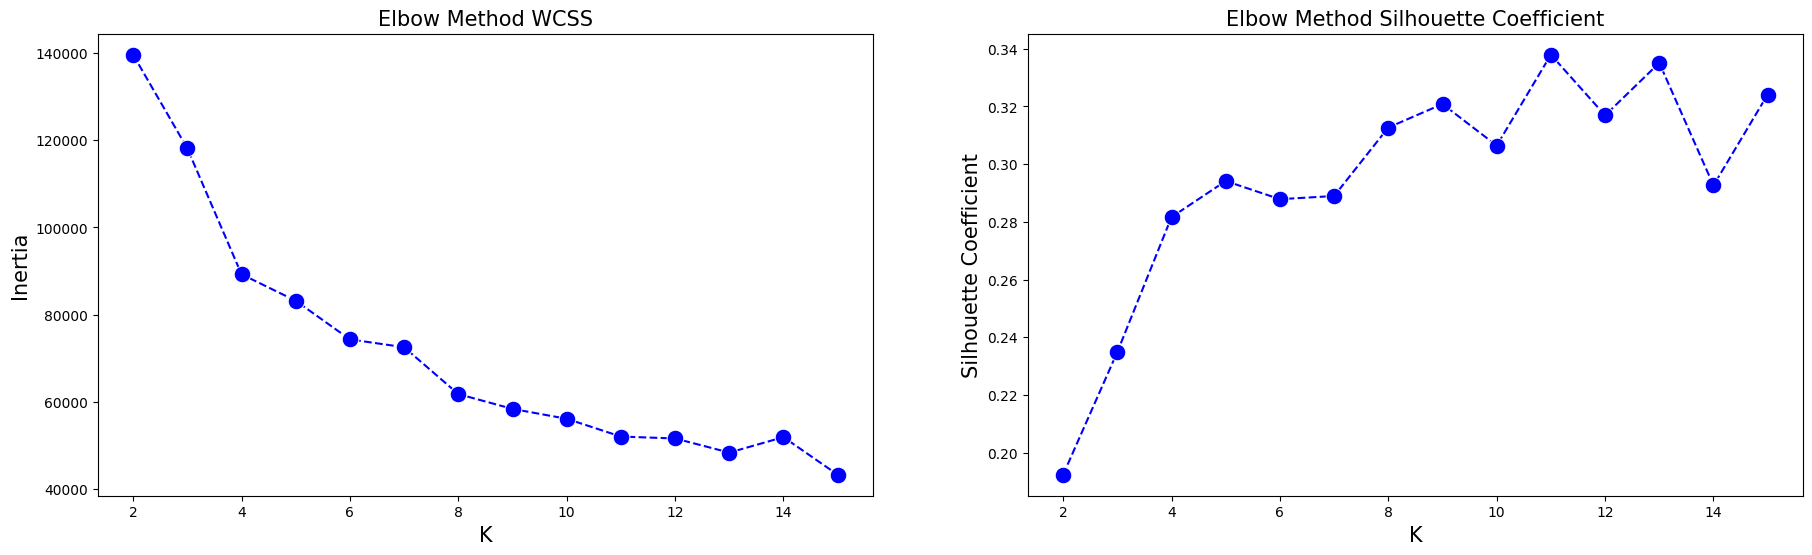

In [440]:
def suma_cuadrados_distancias(data, centroides, clusters):
    distances = np.sum((data - centroides[clusters])**2, axis=1)
    return np.sum(distances)

def silhouette(data, clusters):
    n = len(data)
    a = np.zeros(n)
    b = np.zeros(n)

    for i in range(n):
        cluster_i = clusters[i]
        cluster_points_i = data[clusters == cluster_i]
        a[i] = np.mean(np.linalg.norm(data[i] - cluster_points_i, axis=1))

        min_b = np.inf
        for j in range(n):
            if clusters[j] != cluster_i:
                cluster_points_j = data[clusters == clusters[j]]
                dist = np.mean(np.linalg.norm(data[i] - cluster_points_j, axis=1))
                min_b = min(min_b, dist)
        b[i] = min_b

    silhouette_values = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_values)

def metricas(data, max_k, umbral):
    distancias = []
    silhouettes = []
    for k in range(2, max_k + 1):
        centroides, clusters = kmeans(data, k, umbral)
        suma_distancias = suma_cuadrados_distancias(data, centroides, clusters)
        silhouette_value = silhouette(data, clusters)
        distancias.append(suma_distancias)
        silhouettes.append(silhouette_value)

    return distancias, silhouettes

umbral = 4.5
max_k = 15
K = range(2, max_k + 1)


np.random.seed(6)
distancias, silhouette_scores = metricas(data_reduced, max_k, umbral)

fig, axes = plt.subplots(1, 2, figsize=(22, 6))

for i, (values, title) in enumerate([(distancias, 'Elbow Method WCSS'), (silhouette_scores, 'Elbow Method Silhouette Coefficient')]):
    sns.lineplot(ax=axes[i], x=K, y=values, linestyle='dashed', marker='o', markersize=12, color='b')
    axes[i].set_xlabel('K', size=15)
    axes[i].set_ylabel('Inertia' if i == 0 else 'Silhouette Coefficient', size=15)
    axes[i].set_title(title, size=15)

plt.show()

Como vemos en ambas gráficas, hemos probado con valores de *k* desde 2 hasta 15. Sin la semilla, durante varias ejecuciones, en ambas gráficas, el valor de *k-óptimo* varía más entre los valores [10,12]. Por lo tanto, elegiremos a "dedo" ***k*=11**.

### Experimentación

Teniendo el valor de *k* óptimo, procedemos a ejecutar el algoritmo ***k-means*** con *k*=11. Vamos a experimentar ***k-means*** de la librería *sklearn* y nuestro algoritmo `kmeans`.

#### Librería `sklearn`

In [441]:
np.random.seed(6)
k=11

km = KMeans(n_clusters=k)
y_km = km.fit_predict(data_reduced)
print("Clusters: Librería sklearn")
print("----------------------------------------------------------")
print(y_km)
print(y_km.shape)

Clusters: Librería sklearn
----------------------------------------------------------
[ 8  8  8  1  1  8  1  8  1  8  8  8  1  8  1  8  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  8  8  8  8  8  8  8  8  8  8  8  8  8  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  8  8  9  4  4  4  8  8  8  4  4  4  8  8  3  0  4  4  4  4  4  4  9  9
  9  9  9  9  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  4  4  4  4  4
  4  4  4  4  4  4  4 10 10 10 10 10  3  3  3  6  6  6  7  7  7]
(189,)


d:\Proyectos_2023\Machine_Learning\Proyecto_2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


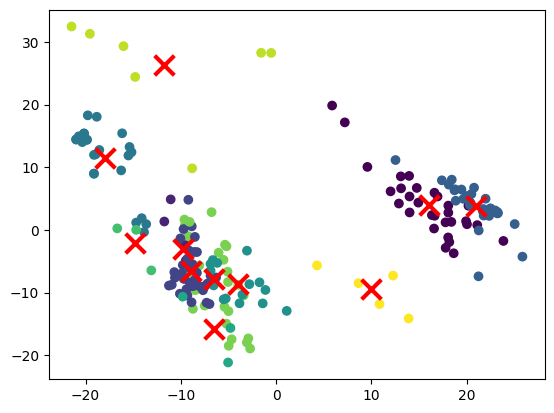

In [442]:
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

#### Nuestro algoritmo

In [443]:
np.random.seed(6)
k=11
centroides_kmeans, clusters_kmeans = kmeans(data_reduced, k, umbral)
print("Clusters: Algoritmo propio")
print("----------------------------------------------------------")
print(clusters_kmeans)
print(clusters_kmeans.shape)

Clusters: Algoritmo propio
----------------------------------------------------------
[ 5  5  5  6  6  5  6  5  6  5  5  5  5  5  6  5  2  2  9  2  9  2  9  2
  9  9  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10  5  5  5  5  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  5  5  3  0  0  0  5  5  5  0  0  0  7  7 10  2  0  0  0  0  0  0  3  3
  3  3  3  3  8  8  8  7  8  8  7  7  8  8  8  8  8  8  8  0  0  0  0  0
  0  0  0  0  0  0  0  8  8  8  8  8 10 10 10  1  1  1  4  4  4]
(189,)


En base a nuestra implementación graficaremos solo dos dimensiones de nuestra pca_data y los centroides para ver cómo se comporta el algoritmo de manera parcial.

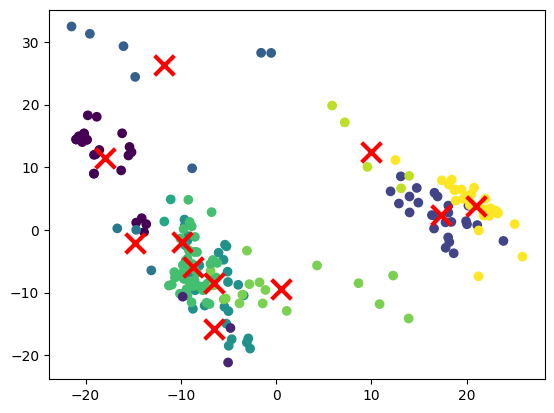

In [444]:
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=clusters_kmeans)
plt.scatter(centroides_kmeans[:, 0], centroides_kmeans[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

> Conclusión: En la comparativa de los resultados, podemos ver que ambos algoritmos tienen resultados muy similares. Tanto en los patrones de asignación de cluster y también lo vemos reflejado en la graficación de dos dimensiones delos centroides y los puntos. Por lo tanto, podemos concluir que nuestro algoritmo ***k-means*** funciona correctamente.

### Métricas: Evaluación de los clusters

In [445]:
print("------------------------ Métricas de Clasificación de K-Means con libreria -------------------------")

clases_vector = clases_data.values.ravel()

homogeneity = homogeneity_score(clases_vector,km.labels_)
print(f'Homogeneidad: {homogeneity:.3f}')

completeness = completeness_score(clases_vector, km.labels_)
print(f'Completitud: {completeness:.3f}')

v_measure = v_measure_score(clases_vector, km.labels_)
print(f'V-measure: {v_measure:.3f}')

silhouette = silhouette_score(data_reduced, km.labels_)
print(f'Coeficiente de silueta: {silhouette:.3f}')


davies_bouldin = davies_bouldin_score(data_reduced, km.labels_)
print(f'Índice de Davies-Bouldin: {davies_bouldin:.3f}')

adjusted_rand = adjusted_rand_score(clases_vector, km.labels_)
print(f'Índice de Rand ajustado: {adjusted_rand:.3f}')

print(" ")
print(" ")
print("------------------------ Métricas de Clasificación de K-Means con nuestra IMPLEMENTACIÓN -------------------------")

homogeneity = homogeneity_score(clases_vector,clusters_kmeans )
print(f'Homogeneidad: {homogeneity:.3f}')

completeness = completeness_score(clases_vector, clusters_kmeans )
print(f'Completitud: {completeness:.3f}')

v_measure = v_measure_score(clases_vector, clusters_kmeans )
print(f'V-measure: {v_measure:.3f}')

silhouette = silhouette_score(data_reduced, clusters_kmeans )
print(f'Coeficiente de silueta: {silhouette:.3f}')


davies_bouldin = davies_bouldin_score(data_reduced, clusters_kmeans )
print(f'Índice de Davies-Bouldin: {davies_bouldin:.3f}')

adjusted_rand = adjusted_rand_score(clases_vector, clusters_kmeans )
print(f'Índice de Rand ajustado: {adjusted_rand:.3f}')

------------------------ Métricas de Clasificación de K-Means con libreria -------------------------
Homogeneidad: 0.978
Completitud: 0.849
V-measure: 0.909
Coeficiente de silueta: 0.325
Índice de Davies-Bouldin: 1.178
Índice de Rand ajustado: 0.869
 
 
------------------------ Métricas de Clasificación de K-Means con nuestra IMPLEMENTACIÓN -------------------------
Homogeneidad: 0.896
Completitud: 0.781
V-measure: 0.834
Coeficiente de silueta: 0.298
Índice de Davies-Bouldin: 1.232
Índice de Rand ajustado: 0.774


 >Los resultados indican que ambas implementaciones de K-Means generaron agrupaciones razonablemente buenas, con la implementación de la biblioteca estándar ligeramente superando a nuestra propia implementación en términos de homogeneidad, completitud y V-Measure. Sin embargo, ambas implementaciones proporcionan resultados satisfactorios en términos de similitud con las etiquetas reales y la calidad del clustering.

### Integración de los clusters en la data original

Luego de obtener los clusters, procedemos a integrarlos en la data original. Para esto, creamos una nueva columna llamada **cluster** en el dataframe **data**. En esta columna, se almacenará el cluster de cada punto.

Las modificaciones lo almacenaremos en la variable ***kmeans_complete***

In [446]:
#Voy a tomar la primera fila de la data original
data_column = data.iloc[0]
kmeans_complete = pd.DataFrame(data)
kmeans_complete = kmeans_complete[1:]
kmeans_complete.columns = data_column
kmeans_complete
kmeans_complete['cluster'] = clusters_kmeans

Finalmente, como nos pide el proyecto, evaluaremos los elementos de cada cluster y lo llamaremos con el nombre del tejido que más se repite.

Para cumplir nuestro objetivo, primero, debemos indexar el nombre de las filas de **data** con el nombre de los tejidos. Luego, creamos un diccionario donde la clave será el cluster y el valor será una lista de los tejidos que pertenecen a ese cluster. Luego, para cada cluster, contamos la cantidad de tejidos que pertenecen a ese cluster y elegimos el tejido que más se repite. Finalmente, almacenamos el nombre del tejido en la variable **tejido**.

In [447]:
rows_ = data.drop(['Unnamed: 0'], axis=0).index
clases_data.index = rows_
cluster_names_kmeans = {}
for i in range(0, k):
    indices = kmeans_complete[kmeans_complete['cluster'] == i].index.values
    cluster_labels = clases_data[0][indices]
    most_common_label = Counter(cluster_labels).most_common(1)
    cluster_names_kmeans[i] = most_common_label[0][0]

    # print("Cluster:", i)
    # print("Nombre más común:", most_common_label[0][0])
    # print(cluster_labels)
    # print("")

print("Nombres Representativos de Clústeres:")
print("  ",cluster_names_kmeans)
print(" ")
print("Tejidos únicos de cluster_names:")
valores_unicos = set(cluster_names_kmeans.values())

for valor in valores_unicos:
    print(" * ", valor)

Nombres Representativos de Clústeres:
   {0: 'liver', 1: 'placenta', 2: 'hippocampus', 3: 'kidney', 4: 'placenta', 5: 'kidney', 6: 'kidney', 7: 'colon', 8: 'endometrium', 9: 'hippocampus', 10: 'cerebellum'}
 
Tejidos únicos de cluster_names:
 *  cerebellum
 *  placenta
 *  endometrium
 *  liver
 *  hippocampus
 *  kidney
 *  colon


Después de nombrar a cada cluster, observamos que en los k clusters podemos encontrar los 7 tejidos con la que estamos trabajando. Por lo tanto, podemos concluir que nuestro algoritmo ***k-means*** funciona correctamente. Si deseamos ver todos los tejidos que contiene cada cluster, simplemente debe descomentar los print que se encuentra en la celda de código.

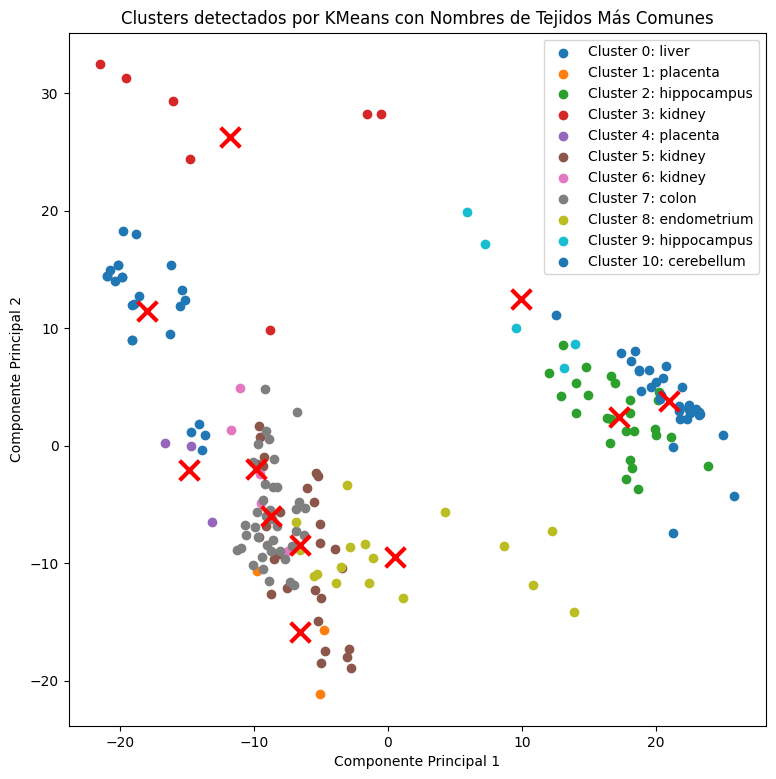

In [448]:
# Visualizar clusters con nombres de tejidos más comunes
plt.figure(figsize=(9,9))
for i in range(k):
    cluster_data = data_reduced[clusters_kmeans == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}: {cluster_names_kmeans[i]}')

plt.scatter(centroides_kmeans[:, 0], centroides_kmeans[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters detectados por KMeans con Nombres de Tejidos Más Comunes')
plt.legend(loc='upper right')
plt.show()

## DBSCAN

### Implementación del algoritmo

1. Definir los valores de los hiperparámetros ***epsilon***y ***minPts***.
2. Creo una lista llamado **labels** del tamaño de las filas de la data de entrenamiendo, en donde se almacenará el nombre del cluster al que pertenece. Como al inicio no sabemos, inicializaremos todos los elementos en -1, en otras palabras, todos los puntos serán ruidos. También creamos un iterador **cluster_label** cuyo valor servirá para el nombre del cluster.
3. Procedo a recorrer todos los puntos que son 189:

   - Cada punto de la data está relacionado a nuestra lista **labels** a través del índice, entonces. Si el *label* del punto es -1, significa que aún no ha sido evaluado, entonces dejamos seguir el código.
   - **Encontrar vecinos - *range\_query(data, euclidean\_distance, p, epsilon)***: Gracias esta función, calculamos los vecinos que tiene nuestro punto en un radio \textbf{epsilon}. Cabe decir, que la distancia de cada punto con otro se calcula con nuestra función ***euclidean_distance(point1, point2)*** en la que usamos cálculo de distancia euclidiana.
   - **Asignar clusters - *expand_cluster(p, neighbors, cluster_label)***: Habiendo obtenido los vecinos del punto calculamos si la cantidad de esta es mayor o igual a \textbf{minPts}. Si es así usamos la función **expand_cluster** para asignar el cluster valor **cluster_label** al punto que se está evaluando y sus vecino identificados en el anterior paso.
   - Aumentamos en 1 la variable **cluster_label**.
4. Finalmente retornamos nuestra lista de clusters almacenado en **labels**.

In [449]:
def euclidean_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Los puntos tienen dimensiones diferentes")
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(point1, point2)]))


def dbscan(data, epsilon, minPts):
    labels = [-1] * len(data) # Creo una listas de cluster que tiene como valores iniciales a 'None' (no asignadas)
    cluster_label = 0

    def range_query(data, dist, p, epsilon):
        # Encuentra los vecinos del punto p dentro de un radio epsilon
        neighbors = []
        for q in range(len(data)):
            if dist(data[p], data[q]) <= epsilon:
                neighbors.append(q)
        return neighbors

    def expand_cluster(p, neighbors, cluster_label):
        labels[p] = cluster_label
        i = -1
        while i < len(neighbors):
            q = neighbors[i]
            if labels[q] == -1:
                labels[q] = cluster_label
                q_neighbors = range_query(data, euclidean_distance, q, epsilon)
                if len(q_neighbors) >= minPts:
                    neighbors += q_neighbors
            i += 1

    for p in range(len(data)):
        if labels[p] != -1: #Salta los puntos ya procesados
            continue  

        neighbors = range_query(data, euclidean_distance, p, epsilon)

        if len(neighbors) >= minPts:    
            expand_cluster(p, neighbors, cluster_label)
            cluster_label += 1
                

    return np.array(labels)

### Encontrando los hipérparametros óptimos

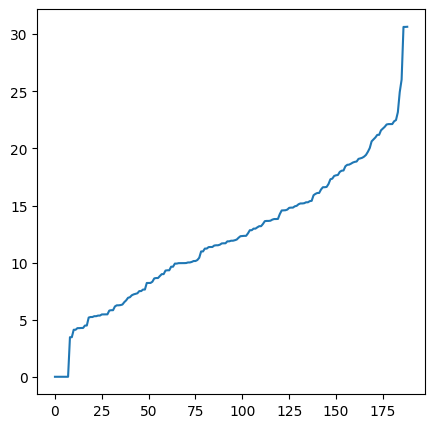

In [450]:
neighbors = NearestNeighbors(n_neighbors=data_reduced.shape[0]).fit(data_reduced)
neighbors_fit = neighbors.fit(data_reduced)
distances, indices = neighbors_fit.kneighbors(data_reduced)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(5,5))
plt.plot(distances)

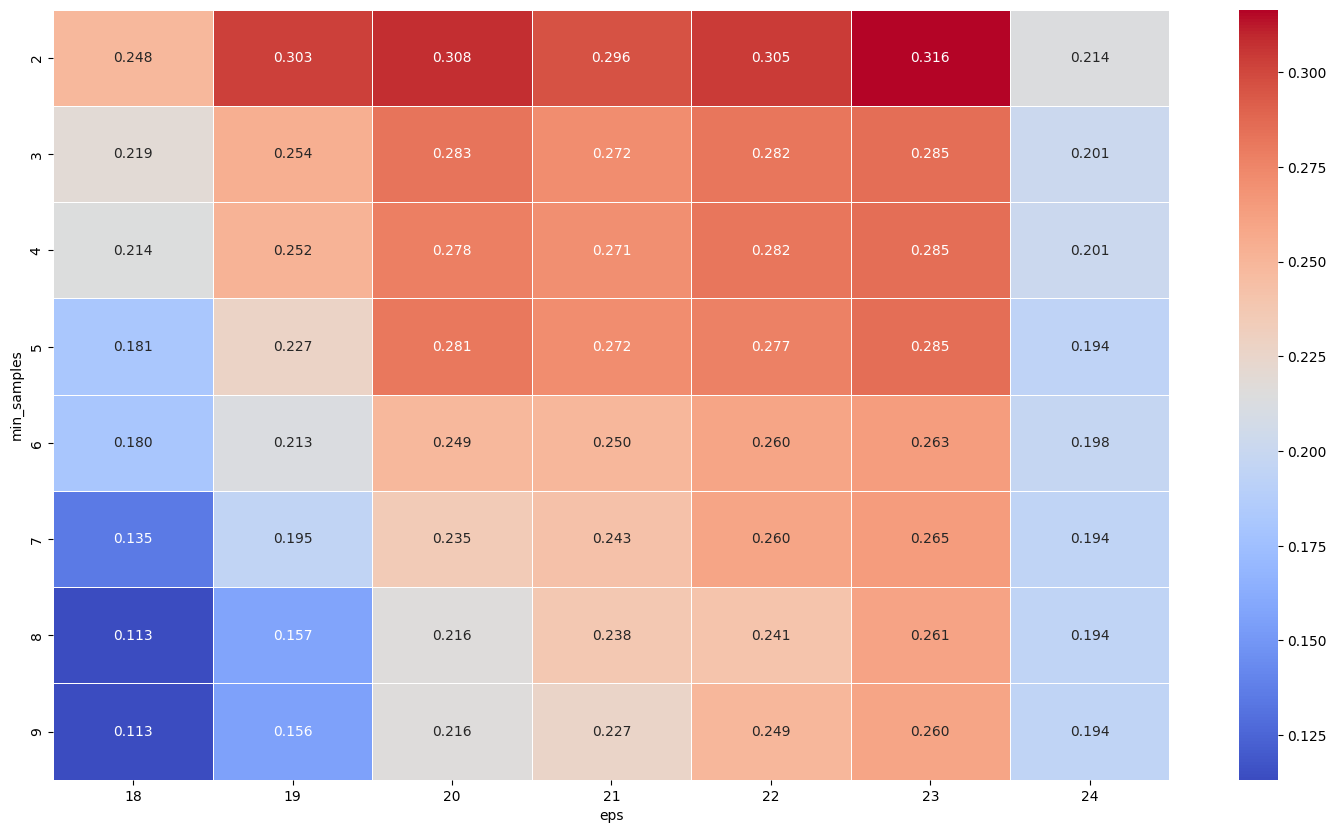

In [451]:
eps_values = np.arange(18,25,1)
min_samples = np.arange(2,10)

dbscan_params = list(product(eps_values, min_samples))
silhouette_scores = []

for params in dbscan_params:
    dbscan_cluster = DBSCAN(eps= params[0], min_samples= params[1])
    clusters = dbscan_cluster.fit_predict(data_reduced)
    silhouette_scores.append(silhouette_score(data_reduced, clusters))

df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['eps', 'min_samples']).assign(silhouette_score=silhouette_scores)
df_params_tunning['silhouette_score'] = silhouette_scores
pivot_data = pd.pivot_table(df_params_tunning, index='min_samples', columns='eps', values='silhouette_score')
fig,ax = plt.subplots(figsize=(18,10))
sns.heatmap(pivot_data, annot=True, annot_kws = {'size':10}, cmap='coolwarm', linewidths=.5, fmt='.3f', ax=ax)
plt.show()

Luego de visualizar la gráfica, notamos que el mayor coeficiente de silueta se obtiene trabajando con **epsilon** = 23 y **minPt** = 2.

### Experimentación

#### Librería `sklearn`

In [452]:
dbscan_cluster = DBSCAN(eps= 23, min_samples= 2)
dblib_y = dbscan_cluster.fit_predict(data_reduced)
print(dblib_y.shape)
print("Clusters-DBSCAN: Librería sklearn")
print("----------------------------------------------------------")
print(dblib_y)
print(silhouette_score(data_reduced,dblib_y))

(189,)
Clusters-DBSCAN: Librería sklearn
----------------------------------------------------------
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  0  0  0  4  4  4  0  0  0  4 -1  4  0  0  2  1  4  5  5  5  5  5  6  6
  7  7  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  5  5 10  5  5
 10  5  5  5  5  5  5 11 11 11 11 11  2  2  2 12 12 -1 -1 -1 -1]
0.31649767111278215


#### Nuestro algoritmo

In [453]:
dbscan_cluster = dbscan(data_reduced, epsilon=23, minPts=2)
print(dbscan_cluster.shape)
print("Clusters-DBSCAN: Algoritmo propio")
print("----------------------------------------------------------")
print(dbscan_cluster)
print(silhouette_score(data_reduced,dbscan_cluster))

(189,)
Clusters-DBSCAN: Algoritmo propio
----------------------------------------------------------
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  0  0  0  4  4  4  0  0  0  4 -1  4  0  0  2  1  4  5  5  5  5  5  6  6
  7  7  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  5  5 10  5  5
 10  5  5  5  5  5  5 11 11 11 11 11  2  2  2 12 12 -1 -1 -1 -1]
0.31649767111278215


> Podemo concluir que nuestra implementación de DBSCAN funciona correctamente, puesto que, podemos compararlo con la implementación de la librería *sklearn* y vemos que los resultados son literalmente iguales, hasta su coeficiente de silueta.

### Métricas: Evaluación de los clusters

In [454]:
print("------------------------ Métricas de Clasificación de DBSCAN con libreria -------------------------")

clases_vector = clases_data.values.ravel()

homogeneity = homogeneity_score(clases_vector,dblib_y)
print(f'Homogeneidad: {homogeneity:.3f}')

completeness = completeness_score(clases_vector, dblib_y)
print(f'Completitud: {completeness:.3f}')

v_measure = v_measure_score(clases_vector, dblib_y)
print(f'V-measure: {v_measure:.3f}')

silhouette = silhouette_score(data_reduced, dblib_y)
print(f'Coeficiente de silueta: {silhouette:.3f}')


davies_bouldin = davies_bouldin_score(data_reduced, dblib_y)
print(f'Índice de Davies-Bouldin: {davies_bouldin:.3f}')

adjusted_rand = adjusted_rand_score(clases_vector, dblib_y)
print(f'Índice de Rand ajustado: {adjusted_rand:.3f}')

print(" ")
print(" ")
print("------------------------ Métricas de Clasificación de DBSCAN con nuestra IMPLEMENTACIÓN -------------------------")

homogeneity = homogeneity_score(clases_vector,dbscan_cluster)
print(f'Homogeneidad: {homogeneity:.3f}')

completeness = completeness_score(clases_vector, dbscan_cluster )
print(f'Completitud: {completeness:.3f}')

v_measure = v_measure_score(clases_vector, dbscan_cluster )
print(f'V-measure: {v_measure:.3f}')

silhouette = silhouette_score(data_reduced, dbscan_cluster )
print(f'Coeficiente de silueta: {silhouette:.3f}')


davies_bouldin = davies_bouldin_score(data_reduced, dbscan_cluster)
print(f'Índice de Davies-Bouldin: {davies_bouldin:.3f}')

adjusted_rand = adjusted_rand_score(clases_vector, dbscan_cluster )
print(f'Índice de Rand ajustado: {adjusted_rand:.3f}')

------------------------ Métricas de Clasificación de DBSCAN con libreria -------------------------
Homogeneidad: 0.985
Completitud: 0.832
V-measure: 0.902
Coeficiente de silueta: 0.316
Índice de Davies-Bouldin: 1.132
Índice de Rand ajustado: 0.877
 
 
------------------------ Métricas de Clasificación de DBSCAN con nuestra IMPLEMENTACIÓN -------------------------
Homogeneidad: 0.985
Completitud: 0.832
V-measure: 0.902
Coeficiente de silueta: 0.316
Índice de Davies-Bouldin: 1.132
Índice de Rand ajustado: 0.877


Estos resultados solo solidifican más que nuestro algoritmo funciona a la perfección

### Integración de los clusters en la data original

Luego de obtener los clusters, procedemos a integrarlos en la data original. Para esto, creamos una nueva columna llamada **cluster** en el dataframe **data**. En esta columna, se almacenará el cluster de cada punto.

Las modificaciones lo almacenaremos en la variable ***dbscan_complete***

In [455]:
#Voy a tomar la primera fila de la data original
data_column = data.iloc[0]
dbscan_complete = pd.DataFrame(data)
dbscan_complete = dbscan_complete[1:]
dbscan_complete.columns = data_column
dbscan_complete['cluster'] = dbscan_cluster

Para cumplir nuestro objetivo, primero, debemos indexar el nombre de las filas de **data** con el nombre de los tejidos. Luego, creamos un diccionario donde la clave será el cluster y el valor será una lista de los tejidos que pertenecen a ese cluster. Luego, para cada cluster, contamos la cantidad de tejidos que pertenecen a ese cluster y elegimos el tejido que más se repite. Finalmente, almacenamos el nombre del tejido en la variable **tejido**.

In [456]:
rows_ = data.drop(['Unnamed: 0'], axis=0).index
clases_data.index = rows_
cluster_names_dbscan = {}
for i in range(-1, max(dbscan_cluster)):
    indices = kmeans_complete[dbscan_complete['cluster'] == i].index.values
    cluster_labels = clases_data[0][indices]
    most_common_label = Counter(cluster_labels).most_common(1)
    cluster_names_dbscan[i] = most_common_label[0][0]

    # print("Cluster:", i)
    # print("Nombre más común:", most_common_label[0][0])
    # print(cluster_labels)
    # print("")

print("Nombres Representativos de Clústeres:")
print("  ",cluster_names_dbscan)
print(" ")
print("Tejidos únicos de cluster_names:")
valores_unicos = set(cluster_names_dbscan.values())

for valor in valores_unicos:
    print(" * ", valor)

Nombres Representativos de Clústeres:
   {-1: 'placenta', 0: 'kidney', 1: 'hippocampus', 2: 'cerebellum', 3: 'colon', 4: 'liver', 5: 'liver', 6: 'cerebellum', 7: 'liver', 8: 'kidney', 9: 'endometrium', 10: 'liver', 11: 'cerebellum'}
 
Tejidos únicos de cluster_names:
 *  cerebellum
 *  placenta
 *  endometrium
 *  liver
 *  hippocampus
 *  kidney
 *  colon


Observamos que nuestro algoritmo DBSCAN clasificó toda la data en 13 clusters, además en los 13 clusters podemos encontrar los 7 tejidos con la que estamos trabajando. Por lo tanto, podemos concluir que nuestro algoritmo ***k-means*** funciona correctamente. Si deseamos ver todos los tejidos que contiene cada cluster, simplemente debe descomentar los print que se encuentra en la celda de código.

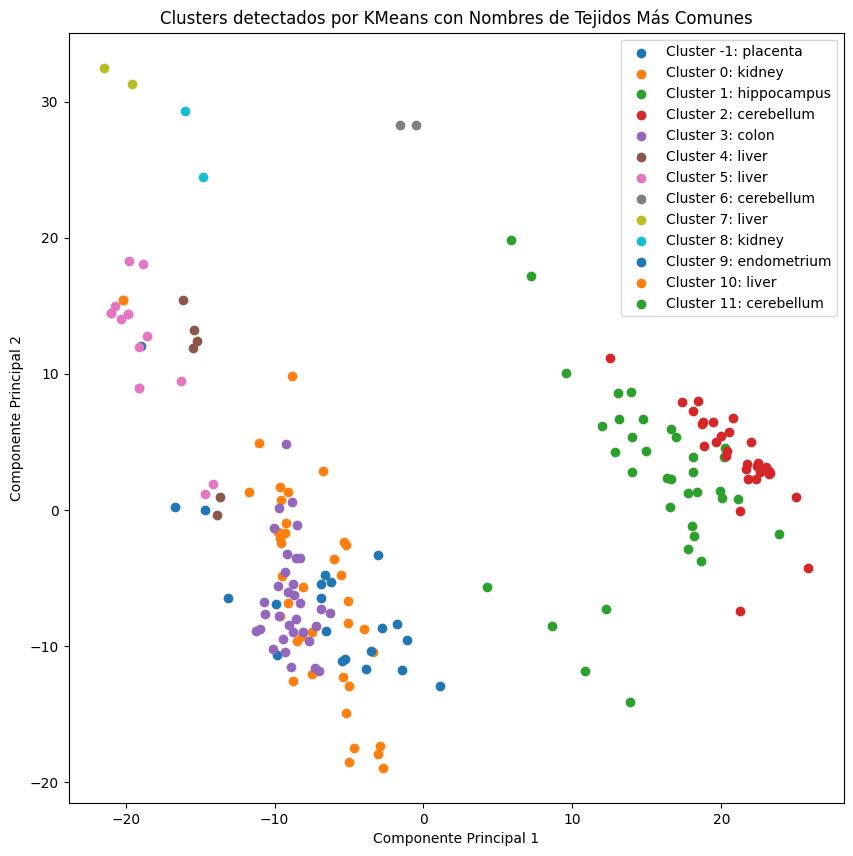

In [457]:
# Visualizar clusters con nombres de tejidos más comunes
plt.figure(figsize=(10,10))
for i in range(-1, max(dbscan_cluster)):
    cluster_data = data_reduced[dbscan_cluster == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}: {cluster_names_dbscan[i]}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters detectados por KMeans con Nombres de Tejidos Más Comunes')
plt.legend(loc='upper right')
plt.show()

## Agglomerative Hierarchical Clustering

El algoritmo de esta técnica es:
1. **Comenzar con un conjunto de datos**: Inicialmente, cada observación se considera un clúster independiente.

2. **Calcular la matriz de distancias**: Se calcula una matriz de distancias que mide la similitud entre todas las parejas de observaciones en función de una métrica de distancia, como la distancia euclidiana.

3. **Encontrar los clústeres más cercanos**: Se identifican los dos clústeres más cercanos en función de la matriz de distancias. Estos clústeres se fusionan en uno solo.

4. **Actualizar la matriz de distancias**: Se actualiza la matriz de distancias para reflejar la fusión de clústeres. Esto generalmente implica calcular las distancias entre el nuevo clúster y los clústeres restantes utilizando métodos como el enlace único, el enlace completo o el enlace promedio.

5. **Repetir los pasos 3 y 4**: Se repiten los pasos 3 y 4 hasta que quede un solo clúster que contiene todas las observaciones. Esto forma una jerarquía de clústeres.

6. **Construir el dendrograma**: A medida que se fusionan clústeres, se crea un dendrograma que representa la estructura jerárquica de los clústeres. El dendrograma muestra cómo las observaciones se agrupan a diferentes niveles de similitud.

Elegir el número de clústeres: El usuario puede elegir cortar el dendrograma en un punto que determine el número deseado de clústeres, dependiendo de los objetivos del análisis.

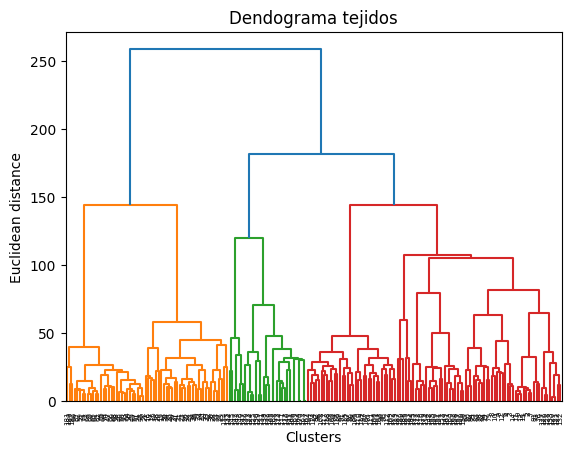

In [458]:
dendogram_plot = dendrogram(linkage(data_reduced,method='ward'))
plt.title('Dendograma tejidos')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [459]:
n_clusters = 11
hc = AgglomerativeClustering(n_clusters, metric='euclidean',linkage='ward')
hc_clusters = hc.fit_predict(data_reduced)
print(silhouette_score(data_reduced,hc_clusters))
hc_clusters

0.3245160985685776


array([ 1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  0,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  0,  0,  0, 10, 10, 10,  0,  0,  0, 10, 10, 10,  0,  0,  3,  3,
       10,  8,  8,  8,  8,  8,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  7,  7,  7,  2,  2,  2,  2,
        2,  2], dtype=int64)

### Métricas: Evaluación de los clusters

In [460]:
print("------------------------ Métricas de Clasificación de AHC con libreria -------------------------")

clases_vector = clases_data.values.ravel()

homogeneity = homogeneity_score(clases_vector,hc_clusters)
print(f'Homogeneidad: {homogeneity:.3f}')

completeness = completeness_score(clases_vector, hc_clusters)
print(f'Completitud: {completeness:.3f}')

v_measure = v_measure_score(clases_vector, hc_clusters)
print(f'V-measure: {v_measure:.3f}')

silhouette = silhouette_score(data_reduced, hc_clusters)
print(f'Coeficiente de silueta: {silhouette:.3f}')


davies_bouldin = davies_bouldin_score(data_reduced, hc_clusters)
print(f'Índice de Davies-Bouldin: {davies_bouldin:.3f}')

adjusted_rand = adjusted_rand_score(clases_vector, hc_clusters)
print(f'Índice de Rand ajustado: {adjusted_rand:.3f}')

------------------------ Métricas de Clasificación de AHC con libreria -------------------------
Homogeneidad: 0.968
Completitud: 0.804
V-measure: 0.879
Coeficiente de silueta: 0.325
Índice de Davies-Bouldin: 1.265
Índice de Rand ajustado: 0.796


Estos resultados me indican que es muy probable que haya elegido bien el numero de clusters que es 11.

### Integración de los clusters en la data original

Luego de obtener los clusters, procedemos a integrarlos en la data original. Para esto, creamos una nueva columna llamada **cluster** en el dataframe **data**. En esta columna, se almacenará el cluster de cada punto.

Las modificaciones lo almacenaremos en la variable ***dbscan_complete***

In [461]:
#Voy a tomar la primera fila de la data original
data_column = data.iloc[0]
ahc_complete = pd.DataFrame(data)
ahc_complete = ahc_complete[1:]
ahc_complete.columns = data_column
ahc_complete['cluster'] = hc_clusters

Para cumplir nuestro objetivo, primero, debemos indexar el nombre de las filas de **data** con el nombre de los tejidos. Luego, creamos un diccionario donde la clave será el cluster y el valor será una lista de los tejidos que pertenecen a ese cluster. Luego, para cada cluster, contamos la cantidad de tejidos que pertenecen a ese cluster y elegimos el tejido que más se repite. Finalmente, almacenamos el nombre del tejido en la variable **tejido**.

In [462]:
rows_ = data.drop(['Unnamed: 0'], axis=0).index
clases_data.index = rows_
cluster_names_ahc = {}
for i in range(n_clusters):
    indices = kmeans_complete[ahc_complete['cluster'] == i].index.values
    cluster_labels = clases_data[0][indices]
    most_common_label = Counter(cluster_labels).most_common(1)
    cluster_names_ahc[i] = most_common_label[0][0]

    # print("Cluster:", i)
    # print("Nombre más común:", most_common_label[0][0])
    # print(cluster_labels)
    # print("")

print("Nombres Representativos de Clústeres:")
print("  ",cluster_names_ahc)
print(" ")
print("Tejidos únicos de cluster_names:")
valores_unicos = set(cluster_names_ahc.values())

for valor in valores_unicos:
    print(" * ", valor)

Nombres Representativos de Clústeres:
   {0: 'kidney', 1: 'kidney', 2: 'placenta', 3: 'hippocampus', 4: 'colon', 5: 'cerebellum', 6: 'endometrium', 7: 'cerebellum', 8: 'liver', 9: 'cerebellum', 10: 'liver'}
 
Tejidos únicos de cluster_names:
 *  cerebellum
 *  placenta
 *  endometrium
 *  liver
 *  hippocampus
 *  kidney
 *  colon


Después de nombrar a cada cluster, observamos que en los n clusters podemos encontrar los 7 tejidos con la que estamos trabajando.

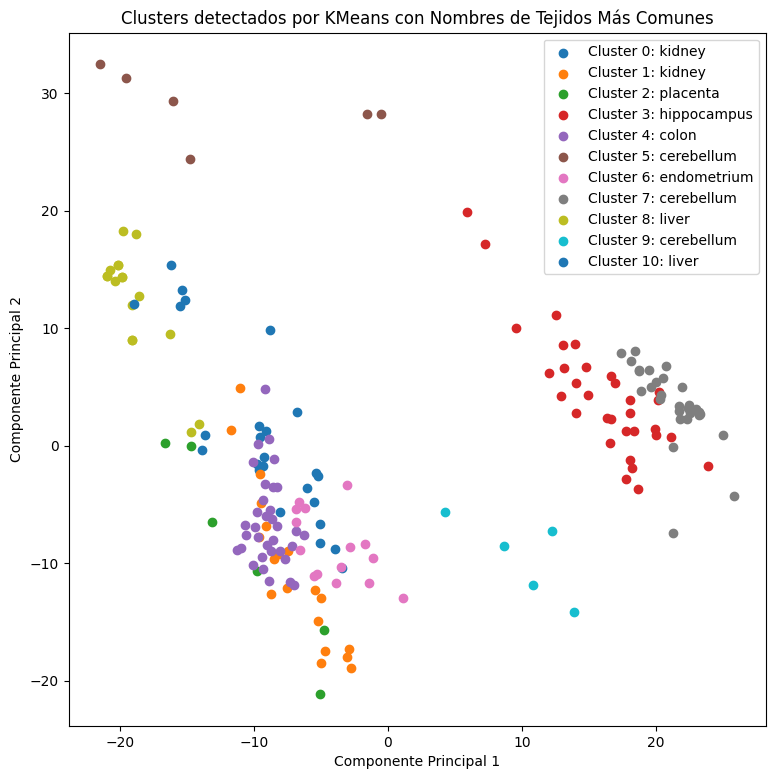

In [463]:
# Visualizar clusters con nombres de tejidos más comunes
plt.figure(figsize=(9,9))
for i in range(n_clusters):
    cluster_data = data_reduced[hc_clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}: {cluster_names_ahc[i]}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters detectados por KMeans con Nombres de Tejidos Más Comunes')
plt.legend(loc='upper right')
plt.show()